# Python Data Visualization

## Data Visualization in Python

Python offers several plotting libraries, namely [Matplotlib](https://www.simplilearn.com/tutorials/python-tutorial/matplotlib), [Seaborn](https://www.simplilearn.com/tutorials/python-tutorial/python-seaborn) and many other such data visualization packages with different features for creating informative, customized, and appealing plots to present data in the most simple and effective way.

## Matplotlib VS Seaborn

Matplotlib and Seaborn are python libraries that are used for data visualization. They have inbuilt modules for plotting different graphs. While Matplotlib is used to embed graphs into applications, Seaborn is primarily used for statistical graphs.

But when should we use either of the two? Let’s understand this with the help of a comparative analysis. The table below provides comparison between Python’s two well-known visualization packages Matplotlib and Seaborn.

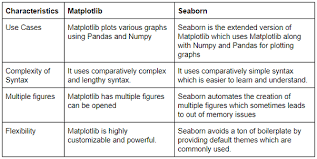

In [10]:
# importing libraries

# Data Wrangling
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# filter warning 
import warnings
warnings.filterwarnings("ignore")

### 1. Line Charts

**What are Line Charts?**

A Line chart is a graph that represents information as a series of data points connected by a straight line.

They are commonly used for visualizing data that changes over **time** or has a natural sequence

**When to Use Line Charts?**

Tracking trends and changes over time

Showing relationships between continous variables

In [5]:
# load the Air Passengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)

In [3]:
# display the first few raws of the dataset
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


**Creating a Basic Line Chart**

To create a basic chart you can use **Matplotlib's** `plot()` function. 

But first we need to transform the timeseries data type into a proper timeseries

In [4]:
# Transform datatype with pd.to_dataset
data["Month"] = pd.to_datetime(data["Month"])

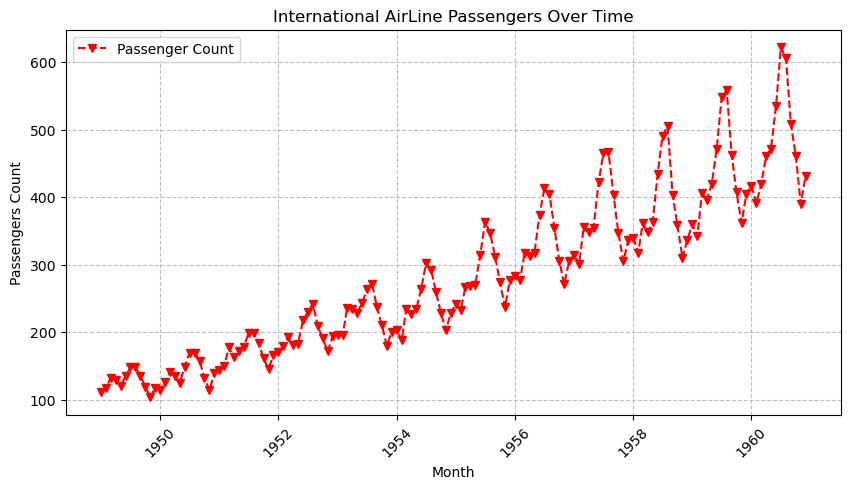

In [11]:
# Create a basic datatype line chart for Air Passengers data
plt.figure(figsize=(10, 5))
plt.plot(data['Month'], data['Passengers'],
        label='Passenger Count', color='red', marker='v', linestyle='--')
plt.title('International AirLine Passengers Over Time')
plt.xlabel('Month')
plt.ylabel('Passengers Count')
plt.xticks(rotation=45, ha='center') # Rotate month labels for readability
plt.legend()
plt.grid(linestyle='--', alpha=0.8)
plt.show()

**Seaborn** provides additional styling options and makes it easier to create visually appeling line charts by futher customize line chart by adjusting colors, markers, labels, etc 

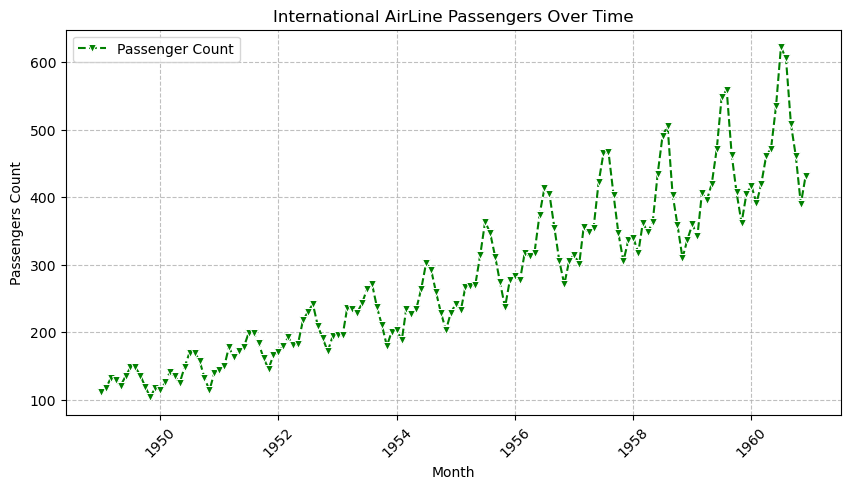

In [22]:
# Create a basic datatype line chart for Air Passengers data using Seaborn
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='Month', y='Passengers',
        label='Passenger Count', color='green', marker='v', linestyle='--')
plt.title('International AirLine Passengers Over Time')
plt.xlabel('Month')
plt.ylabel('Passengers Count')
plt.xticks(rotation=45, ha='center') # Rotate month labels for readability
plt.legend()
plt.grid(linestyle='--', alpha=0.8)
plt.show()

### 2. Bar Graphs

**What are Bar Graphs?**

Bar graphs are charts that use rectangular bars to represent data.

They are suitable for visualizing and comparing categorical data

**When to Use Bar Graphs?**

Comparing data across **different categories.**

Displaying data that doesn't have a natural order or sequence

In [11]:
# load the tips dataset
tips = sns.load_dataset("tips")

In [14]:
# display the first few rpws of the dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# check info
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


**Creating a Basic Vertical Bar Chart**

To create a basic vertical bar chart, use **Matplotlib's** `bar()` function

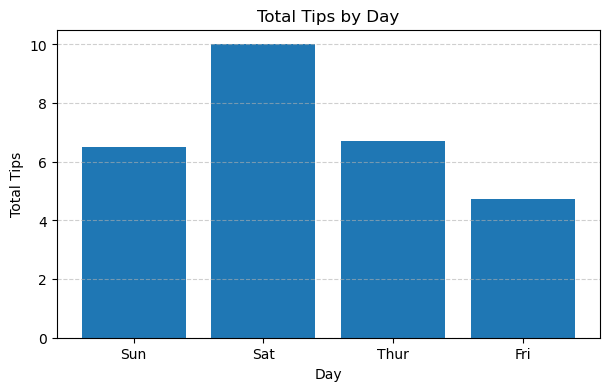

In [17]:
# Create a basic vertical bar chart for day-wise tip totals
plt.figure(figsize=(7, 4))
plt.bar(tips['day'], tips['tip'])
plt.title('Total Tips by Day')
plt.xlabel('Day')
plt.ylabel('Total Tips')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [24]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

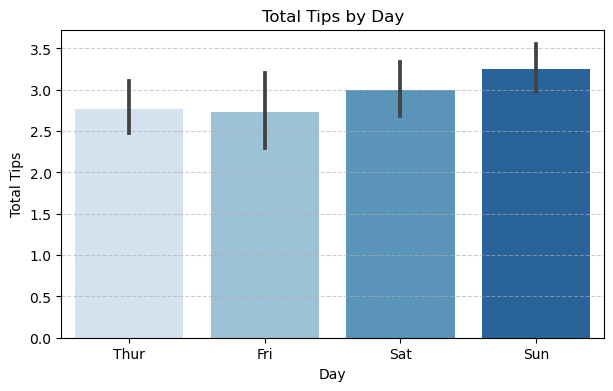

In [23]:
# Create a basic vertical bar chart using seaborn
plt.figure(figsize=(7, 4))
sns.barplot(data=tips, x='day', y='tip', palette='Blues')
plt.title('Total Tips by Day')
plt.xlabel('Day')
plt.ylabel('Total Tips')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Visualization with pandas (https://pandas.pydata.org/docs/user_guide/visualization.html)

In [6]:
# Group data
time_tip_totals = tips.groupby('time')['tip'].sum().reset_index()

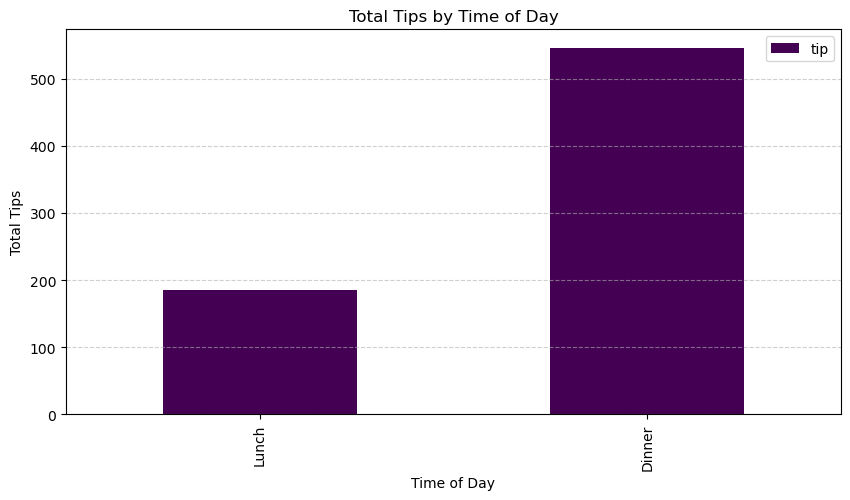

In [37]:
# Create a stacked bar chart for time-wise tip totals with pandas
ax = time_tip_totals.plot(kind='bar', x='time', y='tip', stacked=True, figsize=(10, 5), colormap='viridis')
plt.title('Total Tips by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Tips')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Creating a Basic Vertical Bar Chart with Numerical Labels**

To create a basic vertical bar chart with numerical labels, use **Seaborn's** `barplot()` function

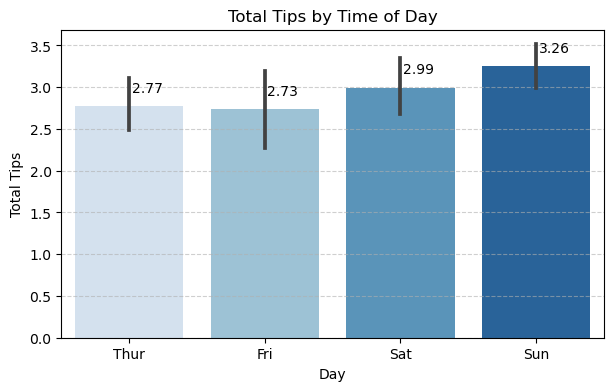

In [46]:
# Create a stacked bar chart for time-wise tip totals with pandas
plt.figure(figsize=(7, 4))
ax = sns.barplot(data=tips, x='day', y='tip', palette='Blues')
plt.title('Total Tips by Time of Day')
plt.xlabel('Day')
plt.ylabel('Total Tips')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add numerical labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
               (p.get_x() + p.get_width() / 1.5, p.get_height()),
               textcoords='offset points', xytext=(0,10),
               ha='center', fontsize=10, color='black')
plt.show()

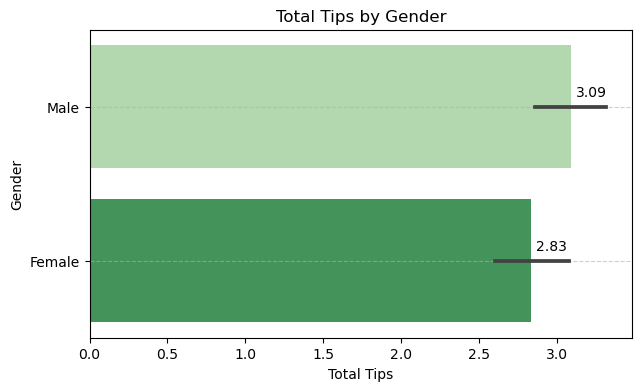

In [49]:
# Create a horizontal bar chart for gender-wise tip totals with numerical labels
plt.figure(figsize=(7, 4))
ax = sns.barplot(data=tips, y='sex', x='tip', palette='Greens')
plt.title('Total Tips by Gender')
plt.xlabel('Total Tips')
plt.ylabel('Gender')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add numerical labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',
               (p.get_width(), p.get_y() + p.get_height() / 2.),
               textcoords='offset points', xytext=(15, 10),
               ha='center', va ='center', fontsize=10, color='black')
plt.show()

### 3. Histogram

**What are Histograms?**

Histograms are graphical representations of the distribution of a dataset

They display the frequency (or count) of data points within specified interval or "bins"

**When to use Histograms?**

Visualizing the distribution of numerical data

Indentifying patterns, skewness, and central tendencies in data

**Creating a Histogram**

To create a histogram using **Matplotlib**, use the `hist()` function

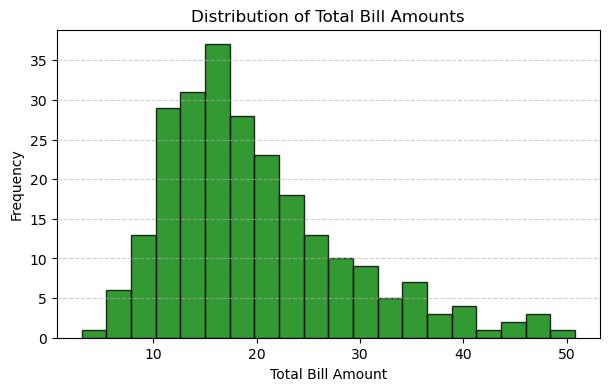

In [50]:
# Customizing the matplotlib histogram appearance
plt.figure(figsize=(7, 4))
plt.hist(tips['total_bill'], bins=20, color='green', alpha=0.8, edgecolor='black')
plt.title('Distribution of Total Bill Amounts')
plt.xlabel('Total Bill Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

We can also use **Seaborn's** `hisplot()` function for a better visualization

You can customize histograms by adjusting the number of bins, adding kernel density estimation (KDE), and chaning colors 

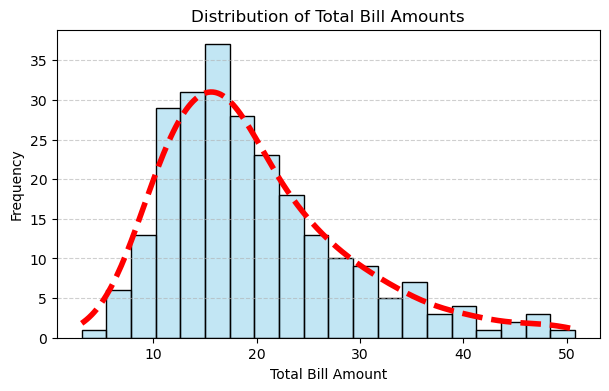

In [7]:
# Customizing the matplotlib histogram appearance
plt.figure(figsize=(7, 4))
ax = sns.histplot(data=tips, x='total_bill', bins=20, kde=True, color='skyblue', line_kws={'lw':4, 'ls':'--'})
ax.lines[0].set_color('red') # line color
plt.title('Distribution of Total Bill Amounts')
plt.xlabel('Total Bill Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### 4. Scatter Plots

**What are Scatter Plots?**

Scatter plots are graphs that display individual data points at dots on a two-dimensional plane

They are used to visualize the relationship between two numerical variables

**When to Use Scatter Plots?**

Exploring relationship and correlations between variables

Identifying patterns, clusters, or outliers in data

**Creating a Scatter Plot**

To create a scatter plot using Matplotlib use the `Scatter()` function

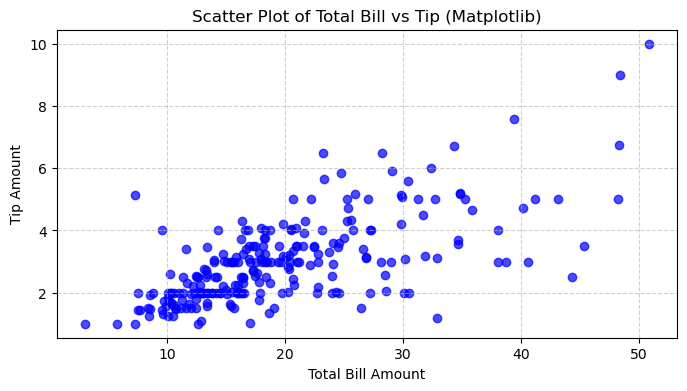

In [12]:
# Create a scatter plot to visualize the relationship between total bill and tip
plt.figure(figsize=(8, 4))
plt.scatter(tips['total_bill'], tips['tip'], color='blue', alpha=0.7)
plt.title('Scatter Plot of Total Bill vs Tip (Matplotlib)')
plt.xlabel('Total Bill Amount')
plt.ylabel('Tip Amount')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Matplotlib allows customization of scatter plots by adjusting colors, makers, and styles

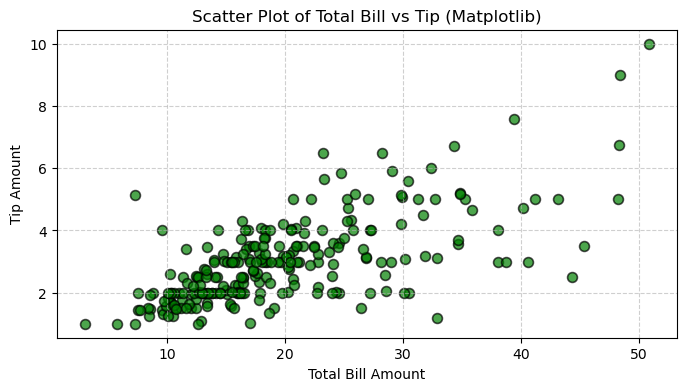

In [9]:
# Customizing the matplotlib scatter plot appearance
plt.figure(figsize=(8, 4))
plt.scatter(tips['total_bill'], tips['tip'], 
            color='green', marker='o', s=50, 
            alpha=0.7, edgecolor='black', linewidths=1.2)
plt.title('Scatter Plot of Total Bill vs Tip (Matplotlib)')
plt.xlabel('Total Bill Amount')
plt.ylabel('Tip Amount')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Seaborn** also provides options for customization of scatter plots, including style adjustments and color palettes 

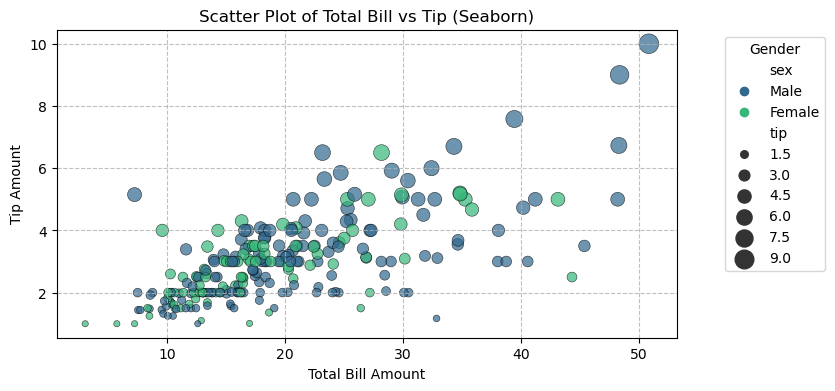

In [12]:
# Customizing the Seaborn scatter plot appearance
plt.figure(figsize=(8, 4))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', 
            palette='viridis', size='tip', sizes=(20,200), 
            alpha=0.7, edgecolor='black', linewidths=1.2)
plt.title('Scatter Plot of Total Bill vs Tip (Seaborn)')
plt.xlabel('Total Bill Amount')
plt.ylabel('Tip Amount')
plt.grid(True, linestyle='--', alpha=0.8)
plt.legend(title='Gender', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

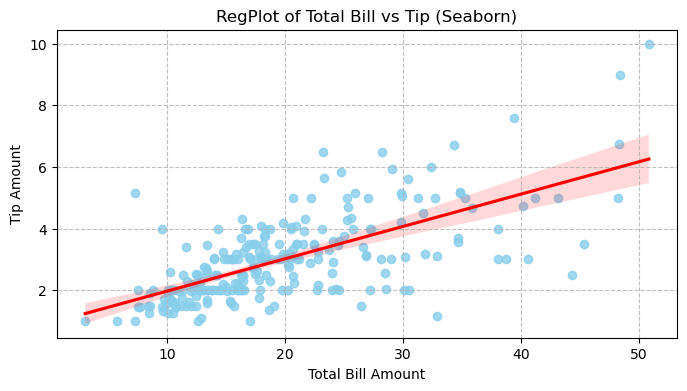

In [15]:
# using Regplot
plt.figure(figsize=(8, 4))
sns.regplot(data=tips, x='total_bill', y='tip', 
                color='skyblue', line_kws=dict(color='r'))
plt.title('RegPlot of Total Bill vs Tip (Seaborn)')
plt.xlabel('Total Bill Amount')
plt.ylabel('Tip Amount')
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

![](https://learn.g2.com/hs-fs/hubfs/Correlation-Vs-Regression.png?width=600)

We can also use 3D plot using **Matplotlib** mpl_tools modules

In [ ]:
# !pip install mpl_toolkits
# kalau belum terinstall

In [16]:
# Import module for 3D plot
from mpl_toolkits.mplot3d import Axes3D

We can also adjust the parameter, add or remove color, labels, etc

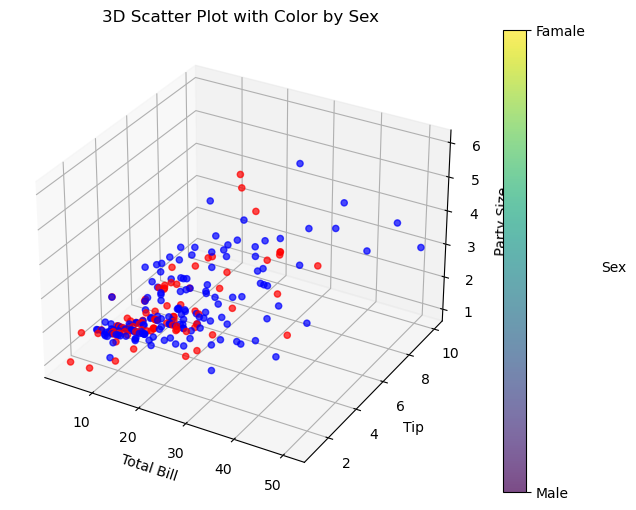

In [17]:
# Create a 3D scatter plot with color cased on the "sex" column
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with total bill, tip, and party size as x, y, and z axes
# Color points based on the "sex" column
scatter = ax.scatter(tips['total_bill'], tips['tip'], tips['size'], c=tips['sex'].map({'Male': 'blue', 'Female': 'red'}), marker='o', alpha=0.7)

ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
ax.set_zlabel('Party Size')

# Create a colorbar to show the legend
legend_labels = ['Male', 'Famale']
cbar=plt.colorbar(scatter, ticks=[0, 1])
cbar.set_label('Sex', rotation=0, labelpad=20)
cbar.set_ticklabels(legend_labels)

plt.title('3D Scatter Plot with Color by Sex')
plt.show()

### 5. Heat Maps
**What are Hwat Maps?**

Heat maps are graphical representations of data where values are depicted as colors

They are useful for visualizing matrices and correlations

**When to Use Heat Maps?**

Exploring relationships and patterns in large datasets.

Visualizing data with two dimensions, such as time-series data or correlation matrices/

**Creating a Heat Map**

**Seaborn** provides extensive customization options for heat maps, including annotations and color palettes 

In [18]:
# Create correlation matrix between numerical columns
tips_num = tips.select_dtypes(exclude = 'object')
corr_matrix = tips_num.corr()

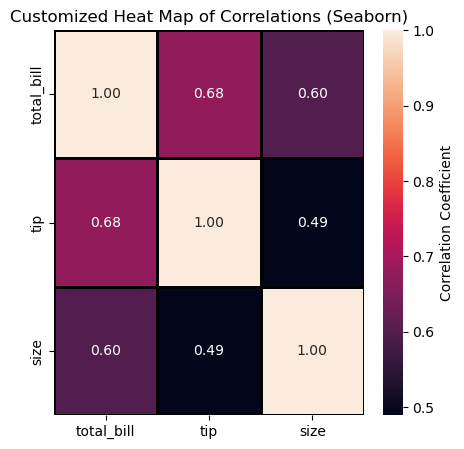

In [19]:
# Customizing the Seaborn heat map appearance
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, linewidths=1,
           linecolor='black', fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Customized Heat Map of Correlations (Seaborn)')
plt.show()

### 6. Pie Chart

**What are Pie Chart?**

Pie Charts are useful for visualizing the composition of a whole and comparing parts to the whole

**When to Use Pie Charts**

Displaying the distribution of categorical data

Showing the composition of a whole (e,g., budget allocation, meal expenses)

In [20]:
# Calculating the sum of total bills for different days
bill_sum_by_day = tips.groupby('day')['total_bill'].sum()

# labels for each slice
labels = bill_sum_by_day.index

You can use **Matplotlib's** `pie()` to create the Pie Chart

In [21]:
# set explode
explode = (0.1, 0, 0, 0)

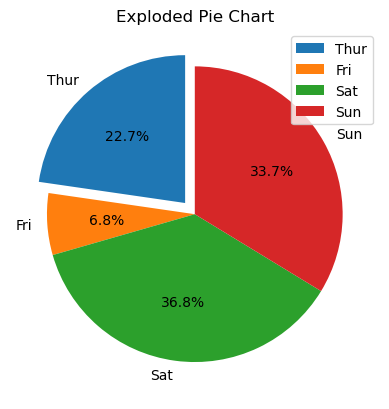

In [23]:
# create basic Pie Chart
plt.pie(bill_sum_by_day, labels=labels, autopct='%1.1f%%', explode=explode, startangle=90)
plt.title('Exploded Pie Chart')
plt.legend(labels, loc='upper right')
plt.show()

A **Donut Chart** is a Pie Chart with a hole in the center. you can create it by specifying a `wedgeprops` parameter

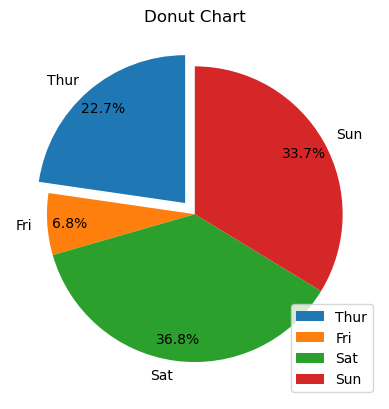

In [24]:
# create a Donut Chart
plt.pie(bill_sum_by_day, labels=labels, autopct='%1.1f%%', pctdistance=0.85, explode=explode, startangle=90)
plt.title('Donut Chart')
plt.legend(labels, loc='best')
plt.show()

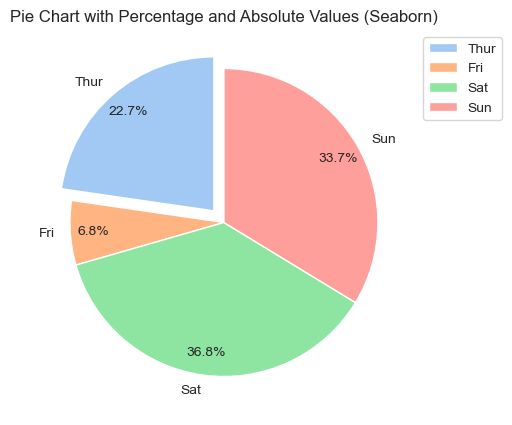

In [25]:
# Display percentage and obsolute values
plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.pie(bill_sum_by_day, labels=labels, autopct='%1.1f%%', pctdistance=0.85, explode=explode, startangle=90)
plt.title('Pie Chart with Percentage and Absolute Values (Seaborn)')
plt.legend(labels, loc='best', bbox_to_anchor=(1.0,1.0))
plt.show()

### 7. Pair Plots

**What are Pair Plots?**

Pair plots are a type of scatter plot that visualizes pairwise relationships between numerical variables in a dataset

They are uselful for exploring multiple relationships simultaneously

**Creating Pair Plots**

To create a pair plot you can use **Seaborn**, you can use the `pairplot()` function

<Figure size 800x500 with 0 Axes>

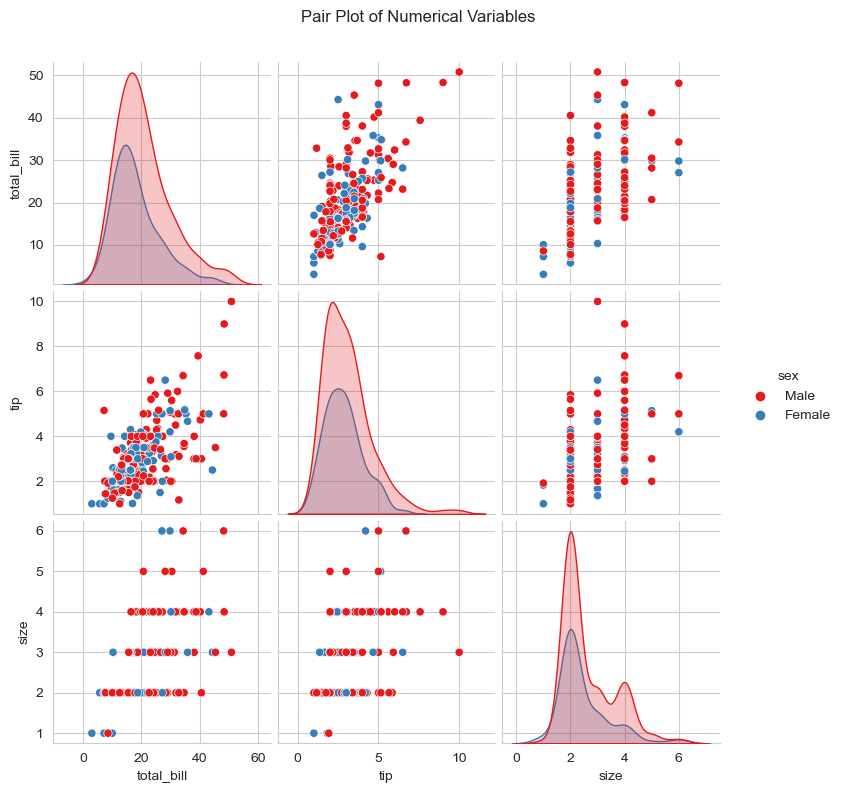

In [29]:
# create a pair plot to visualize pairwise relatioships between numerical columns
plt.figure(figsize=(8, 5))
sns.pairplot(data=tips, hue='sex', palette='Set1')
plt.suptitle('Pair Plot of Numerical Variables', y=1.05)
plt.show()

### 8. Facet Grid

**What are Facet Grid?**

Facet grid allow you to display and compare multiple visualizations within the same figure

This technique is useful for showing related data or comparisons

**Creating Facet Grid (Multiple Graphs in One Plot)**

you can use **Seaborn's** Facet Grid to create multiple graphs in one plot

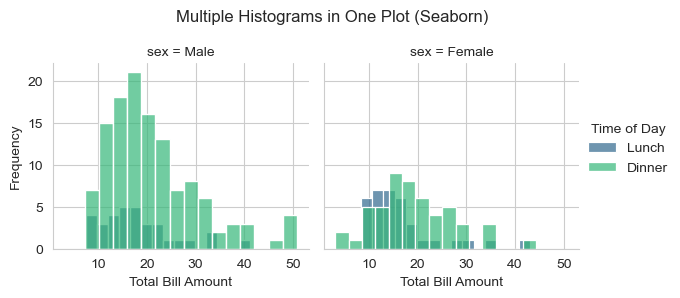

In [28]:
g = sns.FacetGrid(tips, col='sex', hue='time', palette='viridis')
g.map(sns.histplot, 'total_bill', bins=15, alpha=0.7)
g.add_legend(title='Time of Day')
g.set_axis_labels('Total Bill Amount', 'Frequency')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Multiple Histograms in One Plot (Seaborn)')
plt.show()